imported
i was here
i was here
2019-06-28 19:13:55.678031
initialized
Epoch 1/50
17163/17166 [============================>.] - ETA: 0s - loss: 1.0504
Epoch 00001: val_loss improved from inf to 0.79080, saving model to /home/aut_speech/damirchi/checkpoints/3/weights.01.hdf5
17166/17166 [==============================] - 174s 10ms/step - loss: 1.0504 - val_loss: 0.7908
Epoch 2/50
17161/17166 [============================>.] - ETA: 0s - loss: 0.7693
Epoch 00002: val_loss did not improve from 0.79080
17166/17166 [==============================] - 148s 9ms/step - loss: 0.7693 - val_loss: 0.8683
Epoch 3/50
17162/17166 [============================>.] - ETA: 0s - loss: 0.6841
Epoch 00003: val_loss improved from 0.79080 to 0.70246, saving model to /home/aut_speech/damirchi/checkpoints/3/weights.03.hdf5
17166/17166 [==============================] - 145s 8ms/step - loss: 0.6841 - val_loss: 0.7025
Epoch 4/50
17160/17166 [============================>.] - ETA: 0s - loss: 0.6375
Epoch 00004: val_

Epoch 32/50
17163/17166 [============================>.] - ETA: 0s - loss: 0.4344
Epoch 00032: val_loss did not improve from 0.51873
17166/17166 [==============================] - 154s 9ms/step - loss: 0.4344 - val_loss: 0.5485
Epoch 33/50
17163/17166 [============================>.] - ETA: 0s - loss: 0.4333
Epoch 00033: val_loss did not improve from 0.51873
17166/17166 [==============================] - 151s 9ms/step - loss: 0.4333 - val_loss: 0.5619
Epoch 34/50
17163/17166 [============================>.] - ETA: 0s - loss: 0.4326
Epoch 00034: val_loss did not improve from 0.51873
17166/17166 [==============================] - 151s 9ms/step - loss: 0.4326 - val_loss: 0.5225
Epoch 35/50
17160/17166 [============================>.] - ETA: 0s - loss: 0.4307
Epoch 00035: val_loss did not improve from 0.51873
17166/17166 [==============================] - 141s 8ms/step - loss: 0.4307 - val_loss: 0.5263
Epoch 36/50
17164/17166 [============================>.] - ETA: 0s - loss: 0.4281
Epoch 

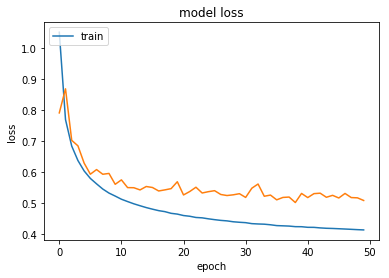

<Figure size 432x288 with 0 Axes>

In [3]:
####################################im gonna try this without iterators
# import libraries.
import numpy as np
from sklearn.utils import shuffle
import tensorflow as tf
import datetime
tf.enable_eager_execution
# from tensorflow import keras
# from keras.models import Sequential
# from keras.layers import Dense
# from keras import layers
# from keras.wrappers.scikit_learn import KerasRegressor
# # import keras
# from keras.layers import BatchNormalization
# from keras import optimizers
# from keras import regularizers

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import layers
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
# import keras
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras import optimizers
from tensorflow.keras import regularizers

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
#import sounddevice as sd
# import tensorflow as tf
# tf.enable_eager_execution()
from pystoi.stoi import stoi
import h5py
######################
#import libraries.
import matplotlib.pyplot as plt
from tabulate import tabulate
import time
import os
import librosa
from librosa.core import stft, istft
####import sounddevice as sd
import time
print('imported')
# #######################
# Data_path = 'D:/studies/university/thesis/speech_separation_codes/du16/donesomestuff'
Data_path = os.getcwd()
# input_tr_name = 'lilftr_refrmd_3h'
# input_val_name = 'ftr_refrmd_test'
# target_tr_name = 'lilsingle_dataset_log_16'
# target_val_name = 'clean_data_wav_norm'
tfrecord_folder_parent = 'tfrecord_files'
tfrecord_folder = 'tfrecord_files_10h_norm'
tfrecord_val_folder = 'validation_10h_norm'
ckpt_folder = '3'
model_name = 'model_3'
buffersize = 5000
# input_tr_path = os.path.normpath(os.path.join(Data_path,input_tr_name))
# input_val_path = os.path.normpath(os.path.join(Data_path,input_val_name))
# target_tr_path = os.path.normpath(os.path.join(Data_path,target_tr_name))
# target_val_path = os.path.normpath(os.path.join(Data_path,target_val_name))

# file = h5py.File(target_val_path+'.hdf5','r')
# val_y = file[target_val_name][0:]
# file.close()
# file = h5py.File(input_val_path+'.hdf5','r')
# val_x = file[input_val_name][0:]
# file.close()

# hh = h5py.File(target_tr_path+'.hdf5', 'r')
# d=hh[target_tr_name]
# len_data=d.shape
# hh.close()
# len_data = (684108, 257)
len_data = (2197278, 257)
val_len = (97278,257)
# file = h5py.File(target_val_path+'.hdf5','r')
# val_y = file[target_val_name]
# val_len=val_y.shape
# file.close()

w=3
# print(len_data)
#######################
#define reconstruct function to reconstruct sound from framed signal.
def reconstruct(wave,angle):
    recon = np.sqrt(np.power(10, wave))
    recon1 = recon*np.cos(angle)+recon*np.sin(angle)*1j
    recon = librosa.core.istft((recon1.T), hop_length=200, win_length=500, window='hann')
    return recon
#######################
I=0
global batch_size
batch_size = 128
# epochs_num=50
global datalen
datalen=len_data[0]

# file.close()
h = [512,512]
seed = 7
rate1 = 0.1
rate2 = 0.2
from tensorflow.keras.layers import Activation
# from keras.layers import Activation
np.random.seed(seed)
model = Sequential()
act1 = layers.LeakyReLU(alpha=0.1)
# model.add(layers.Dropout(rate1, noise_shape=None, seed=None))
# ,kernel_regularizer=regularizers.l2(0.001)
model.add(Dense(h[0], input_dim = w*len_data[1]))
model.add(BatchNormalization())
# model.add(act1)
model.add(Activation('sigmoid'))
act2=layers.LeakyReLU(alpha=0.1)
# model.add(layers.Dropout(rate2, noise_shape=None, seed=None))
model.add(Dense(h[1]))
model.add(act2)
# act3=layers.LeakyReLU(alpha=0.1)
# # model.add(layers.Dropout(rate, noise_shape=None, seed=None))
# model.add(Dense(h[2]))
# model.add(act3)
act=layers.LeakyReLU(alpha=0.01)
model.add(Dense(len_data[1]))
#############################################
import os
from natsort import natsorted

def _parse_function(example_proto):
    features = {"X": tf.FixedLenFeature((3*257), tf.float32),
              "Y": tf.FixedLenFeature((257), tf.float32)}
    parsed_features = tf.parse_single_example(example_proto, features)
    print("i was here")
    return parsed_features["X"], parsed_features["Y"]

# orig_path = os.getcwd()
tfrecord_path = os.path.normpath(os.path.join(Data_path,tfrecord_folder_parent,tfrecord_folder))
sorted_names = natsorted(os.listdir(tfrecord_path))
trainfilenames = []
for i in sorted_names:
    trainfilenames.append(os.path.normpath(os.path.join(tfrecord_path,i)))
# filenames = tf.placeholder(tf.string, shape=[None])
# dataset = tf.data.TFRecordDataset(filenames)
dataset = tf.data.TFRecordDataset(trainfilenames)
dataset = dataset.map(_parse_function)  # Parse the record into tensors.
dataset = dataset.repeat()  # Repeat the input indefinitely.
dataset = dataset.batch(batch_size)
dataset = dataset.shuffle(buffersize)
# iterator = dataset.make_initializable_iterator()


tfrecord_path_val = os.path.normpath(os.path.join(Data_path,tfrecord_folder_parent,tfrecord_val_folder))
sorted_names_val = natsorted(os.listdir(tfrecord_path_val))
trainfilenames_val = []
for i in sorted_names_val:
    trainfilenames_val.append(os.path.normpath(os.path.join(tfrecord_path_val,i)))
# filenames_val = tf.placeholder(tf.string, shape=[None])
# dataset_val = tf.data.TFRecordDataset(filenames_val)
dataset_val = tf.data.TFRecordDataset(trainfilenames_val)
dataset_val = dataset_val.map(_parse_function)  # Parse the record into tensors.
dataset_val = dataset_val.repeat()  # Repeat the input indefinitely.
dataset_val = dataset_val.batch(128)

# iterator_val = dataset_val.make_initializable_iterator()

epochs_num = 50
steps = len_data[0] // batch_size
val_steps = val_len[0] // batch_size
# You can feed the initializer with the appropriate filenames for the current
# phase of execution, e.g. training vs. validation.
# next_elem = iterator_val.get_next()
# Initialize `iterator` with training data.

if not os.path.exists(os.path.join(Data_path,"checkpoints",ckpt_folder)):
    os.makedirs(os.path.join(Data_path,"checkpoints",ckpt_folder))

print(datetime.datetime.now())
# with tf.Session() as sess:
#     sess.run(tf.global_variables_initializer())
#     sess.run(iterator.initializer, feed_dict={filenames: trainfilenames})
#     sess.run(iterator_val.initializer, feed_dict={filenames_val: trainfilenames_val})
print("initialized")
checkpoint_path = os.path.normpath(os.path.join(Data_path,"checkpoints",ckpt_folder,"weights.{epoch:02d}.hdf5"))
checkpoint_dir = os.path.dirname(checkpoint_path)

cp_callback = tf.keras.callbacks.ModelCheckpoint(
    checkpoint_path, verbose=1, save_best_only=True, save_weights_only=True)
    # Save weights, every 5-epochs.
#         period=1)
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=30)
opt = tf.keras.optimizers.Adamax()
#     opt = tf.train.AdamOptimizer()
#     opt = tf.keras.optimizers.SGD()
model.compile(loss='mean_squared_error', optimizer=opt)
history = model.fit( dataset, steps_per_epoch=steps,epochs=epochs_num, callbacks = [cp_callback,early_stop], verbose=1,validation_data=dataset_val,validation_steps=val_steps)
#     model.save(os.path.normpath(os.path.join(Data_path, 'models', "model_3h_dataset.h5")))
#     tf.keras.models.save_model(model, os.path.normpath(os.path.join(Data_path, 'models', "model_3h_dataset.h5")))
#     model.save_weights(os.path.normpath(os.path.join(Data_path, 'models', "model_3h_dataset.h5")))
model_json = model.to_json()
with open(os.path.normpath(os.path.join(Data_path, 'models', model_name + ".json")), "w") as json_file:
    json_file.write(model_json)
# # serialize weights to HDF5
model.save_weights(os.path.normpath(os.path.join(Data_path, 'models', model_name + "model_3.h5")))
print("Saved model to disk")
    
print(datetime.datetime.now())
%matplotlib inline
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()
plt.savefig(os.path.normpath(os.path.join(Data_path,'images',ckpt_folder+'.png')),format='png')
# model_json = model.to_json()
# with open("model_10h_dataset.json", "w") as json_file:
#     json_file.write(model_json)
# model.save_weights("model_10h_dataset.h5")
# print("Saved model to disk")


In [3]:
model = 0

In [6]:
    model_json = model.to_json()
    with open(os.path.normpath(os.path.join(Data_path, 'models', "model_3h_dataset_5.json")), "w") as json_file:
        json_file.write(model_json)
    # # serialize weights to HDF5
    model.save_weights(os.path.normpath(os.path.join(Data_path, 'models', "model_3h_dataset_5.h5")))
    print("Saved model to disk")

FailedPreconditionError: Error while reading resource variable dense_6/kernel from Container: localhost. This could mean that the variable was uninitialized. Not found: Container localhost does not exist. (Could not find resource: localhost/dense_6/kernel)
	 [[node dense_6/kernel/Read/ReadVariableOp (defined at <ipython-input-5-a00c413db055>:103) ]]
	 [[node dense_6/bias/Read/ReadVariableOp (defined at <ipython-input-5-a00c413db055>:103) ]]

Caused by op 'dense_6/kernel/Read/ReadVariableOp', defined at:
  File "/usr/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/usr/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/home/aut_speech/damirchi_env/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/aut_speech/damirchi_env/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/home/aut_speech/damirchi_env/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 505, in start
    self.io_loop.start()
  File "/home/aut_speech/damirchi_env/lib/python3.6/site-packages/tornado/platform/asyncio.py", line 148, in start
    self.asyncio_loop.run_forever()
  File "/usr/lib/python3.6/asyncio/base_events.py", line 427, in run_forever
    self._run_once()
  File "/usr/lib/python3.6/asyncio/base_events.py", line 1440, in _run_once
    handle._run()
  File "/usr/lib/python3.6/asyncio/events.py", line 145, in _run
    self._callback(*self._args)
  File "/home/aut_speech/damirchi_env/lib/python3.6/site-packages/tornado/ioloop.py", line 690, in <lambda>
    lambda f: self._run_callback(functools.partial(callback, future))
  File "/home/aut_speech/damirchi_env/lib/python3.6/site-packages/tornado/ioloop.py", line 743, in _run_callback
    ret = callback()
  File "/home/aut_speech/damirchi_env/lib/python3.6/site-packages/tornado/gen.py", line 781, in inner
    self.run()
  File "/home/aut_speech/damirchi_env/lib/python3.6/site-packages/tornado/gen.py", line 742, in run
    yielded = self.gen.send(value)
  File "/home/aut_speech/damirchi_env/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 357, in process_one
    yield gen.maybe_future(dispatch(*args))
  File "/home/aut_speech/damirchi_env/lib/python3.6/site-packages/tornado/gen.py", line 209, in wrapper
    yielded = next(result)
  File "/home/aut_speech/damirchi_env/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 267, in dispatch_shell
    yield gen.maybe_future(handler(stream, idents, msg))
  File "/home/aut_speech/damirchi_env/lib/python3.6/site-packages/tornado/gen.py", line 209, in wrapper
    yielded = next(result)
  File "/home/aut_speech/damirchi_env/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 534, in execute_request
    user_expressions, allow_stdin,
  File "/home/aut_speech/damirchi_env/lib/python3.6/site-packages/tornado/gen.py", line 209, in wrapper
    yielded = next(result)
  File "/home/aut_speech/damirchi_env/lib/python3.6/site-packages/ipykernel/ipkernel.py", line 294, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/home/aut_speech/damirchi_env/lib/python3.6/site-packages/ipykernel/zmqshell.py", line 536, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/home/aut_speech/damirchi_env/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2848, in run_cell
    raw_cell, store_history, silent, shell_futures)
  File "/home/aut_speech/damirchi_env/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2874, in _run_cell
    return runner(coro)
  File "/home/aut_speech/damirchi_env/lib/python3.6/site-packages/IPython/core/async_helpers.py", line 67, in _pseudo_sync_runner
    coro.send(None)
  File "/home/aut_speech/damirchi_env/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 3049, in run_cell_async
    interactivity=interactivity, compiler=compiler, result=result)
  File "/home/aut_speech/damirchi_env/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 3214, in run_ast_nodes
    if (yield from self.run_code(code, result)):
  File "/home/aut_speech/damirchi_env/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 3296, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-5-a00c413db055>", line 103, in <module>
    model.add(Dense(h[0], input_dim = w*len_data[1]))
  File "/home/aut_speech/damirchi_env/lib/python3.6/site-packages/tensorflow/python/training/checkpointable/base.py", line 442, in _method_wrapper
    method(self, *args, **kwargs)
  File "/home/aut_speech/damirchi_env/lib/python3.6/site-packages/tensorflow/python/keras/engine/sequential.py", line 164, in add
    layer(x)
  File "/home/aut_speech/damirchi_env/lib/python3.6/site-packages/tensorflow/python/keras/engine/base_layer.py", line 538, in __call__
    self._maybe_build(inputs)
  File "/home/aut_speech/damirchi_env/lib/python3.6/site-packages/tensorflow/python/keras/engine/base_layer.py", line 1603, in _maybe_build
    self.build(input_shapes)
  File "/home/aut_speech/damirchi_env/lib/python3.6/site-packages/tensorflow/python/keras/layers/core.py", line 949, in build
    trainable=True)
  File "/home/aut_speech/damirchi_env/lib/python3.6/site-packages/tensorflow/python/keras/engine/base_layer.py", line 349, in add_weight
    aggregation=aggregation)
  File "/home/aut_speech/damirchi_env/lib/python3.6/site-packages/tensorflow/python/training/checkpointable/base.py", line 607, in _add_variable_with_custom_getter
    **kwargs_for_getter)
  File "/home/aut_speech/damirchi_env/lib/python3.6/site-packages/tensorflow/python/keras/engine/base_layer_utils.py", line 145, in make_variable
    aggregation=aggregation)
  File "/home/aut_speech/damirchi_env/lib/python3.6/site-packages/tensorflow/python/ops/variables.py", line 213, in __call__
    return cls._variable_v1_call(*args, **kwargs)
  File "/home/aut_speech/damirchi_env/lib/python3.6/site-packages/tensorflow/python/ops/variables.py", line 176, in _variable_v1_call
    aggregation=aggregation)
  File "/home/aut_speech/damirchi_env/lib/python3.6/site-packages/tensorflow/python/ops/variables.py", line 155, in <lambda>
    previous_getter = lambda **kwargs: default_variable_creator(None, **kwargs)
  File "/home/aut_speech/damirchi_env/lib/python3.6/site-packages/tensorflow/python/ops/variable_scope.py", line 2488, in default_variable_creator
    import_scope=import_scope)
  File "/home/aut_speech/damirchi_env/lib/python3.6/site-packages/tensorflow/python/ops/variables.py", line 217, in __call__
    return super(VariableMetaclass, cls).__call__(*args, **kwargs)
  File "/home/aut_speech/damirchi_env/lib/python3.6/site-packages/tensorflow/python/ops/resource_variable_ops.py", line 294, in __init__
    constraint=constraint)
  File "/home/aut_speech/damirchi_env/lib/python3.6/site-packages/tensorflow/python/ops/resource_variable_ops.py", line 446, in _init_from_args
    value = self._read_variable_op()
  File "/home/aut_speech/damirchi_env/lib/python3.6/site-packages/tensorflow/python/ops/resource_variable_ops.py", line 728, in _read_variable_op
    self._dtype)
  File "/home/aut_speech/damirchi_env/lib/python3.6/site-packages/tensorflow/python/ops/gen_resource_variable_ops.py", line 550, in read_variable_op
    "ReadVariableOp", resource=resource, dtype=dtype, name=name)
  File "/home/aut_speech/damirchi_env/lib/python3.6/site-packages/tensorflow/python/framework/op_def_library.py", line 788, in _apply_op_helper
    op_def=op_def)
  File "/home/aut_speech/damirchi_env/lib/python3.6/site-packages/tensorflow/python/util/deprecation.py", line 507, in new_func
    return func(*args, **kwargs)
  File "/home/aut_speech/damirchi_env/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 3300, in create_op
    op_def=op_def)
  File "/home/aut_speech/damirchi_env/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 1801, in __init__
    self._traceback = tf_stack.extract_stack()

FailedPreconditionError (see above for traceback): Error while reading resource variable dense_6/kernel from Container: localhost. This could mean that the variable was uninitialized. Not found: Container localhost does not exist. (Could not find resource: localhost/dense_6/kernel)
	 [[node dense_6/kernel/Read/ReadVariableOp (defined at <ipython-input-5-a00c413db055>:103) ]]
	 [[node dense_6/bias/Read/ReadVariableOp (defined at <ipython-input-5-a00c413db055>:103) ]]


In [3]:
file.close()

In [35]:
testload=tf.keras.models.load_model('model_10h_dataset.h5')

ValueError: No model found in config file.

In [27]:
a=tf.constant([1,2,3])
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    label_numpy = a.eval()

In [4]:
import h5py 
import tensorflow as tf
hh = h5py.File(os.path.normpath(os.path.join(Data_path,'10hdata','ftr_refrmd_10h.hdf5')), 'r')
d=hh['ftr_refrmd_10h']
len_data=d.shape
hh.close()
len_data

(2197278, 771)

In [24]:
file.close()

In [92]:
dataset

<PrefetchDataset shapes: ((?, 257), (?,)), types: (tf.float32, tf.float32)>